импорты

In [1]:
import os
import numpy as np
from natsort import natsorted
import matplotlib.pyplot as plt
import re
import pandas as pd
from scipy import signal

константы

In [2]:
# 153 884    измеряемый диапазон. 0-2136 диапазон данных
start = 400  # нм
end = 700  # нм
step = (884 - 153) / 2134


def nm_to_x(nm):
    return round((nm - start) / step)


# номера точек в массиве по координате х
start_point = round((start - 153) / step)
end_point = start_point + int((end - start) / step)
lamp_point = nm_to_x(565)
mean_point = nm_to_x(650)
min_point = nm_to_x(420)

x = np.arange(start + step, end, step)

функции получения данных

In [4]:
def get_rmr(spec):
    y = []
    spec = re.split(",", spec)
    y = list(map(float, spec[start_point + 11 : end_point + 11]))
    return y


def get_txt(spec):
    y = []
    spec = re.split("\n|\t", spec)
    for j in range(start_point, end_point):
        y.append(spec[j * 2 + 15].replace(",", "."))
    return y


def get_csv(spec):
    y = []
    spec = re.split("\n|,", spec)
    for j in range(int(len(spec) / 2)):
        y.append(spec[j * 2 + 1].replace(",", "."))

    return y


def get_data_rmr(path):
    """получение всей папки в виде списка с массивами np"""
    _file_list = np.array(natsorted(os.listdir(path)))
    _data = []
    for file in range(len(_file_list)):
        with open(path + _file_list[file], "r", encoding="utf8") as spec:
            spec = spec.read()
        spec = re.split(",", spec)
        _data.append(np.array(spec[start_point + 11 : end_point + 11], dtype=float))
    #    _data.append(get_rmr(spec))
    return _data


def get_data_csv(path):
    """получение всей папки в виде списка с массивами np"""
    _file_list = np.array(natsorted(os.listdir(path)))
    _data = []
    for file in range(len(_file_list)):
        with open(path + _file_list[file], "r", encoding="utf8") as spec:
            spec = spec.read()
            _data.append(np.array(get_csv(spec), dtype=float))
    #    _data.append(get_rmr(spec))
    return _data


def get_base(base_folder):
    b = []
    for a in ("/dark.csv", "/light.csv", "/bg.csv"):
        with open(base_folder + a, "r", encoding="utf8") as spec:
            spec = spec.read()
            b.append(np.array(get_csv(spec), dtype=float))
    return b


def calc(mas, base):
    d = base[0]
    l = base[1]
    bg = base[2]
    b = l - bg
    m = np.copy(mas)
    q = []

    a = mas - bg
    c = a / b
    d = np.log10(c)
    q = -d
    return q

получение данных из необработанных спектров

In [43]:
# получение всех спектров в виде списка в котором
# каждая строка - папка, а каждый элемент - массив np с спектром
data_row = []  # изанчальные графики
data = []  # сглаженные графики

main_folder = r"C:\Users\Nik\Desktop\prog\08-12-2023_Zagrebaev_Au_NPs\T=20\2-1"
main_folder = main_folder.replace(chr(92), "/")
folders_list = np.array(natsorted(os.listdir(main_folder)))
print(main_folder)

base = get_base(main_folder + "/base")
m = 20
folders_list = folders_list[2:]
# m=len(folders_list)

for i in range(len(folders_list)):
    data_row.append(get_data_csv(main_folder + "/" + folders_list[i] + "/"))

print("получено " + str(len(data_row)) + " папок")

C:/Users/Nik/Desktop/prog/08-12-2023_Zagrebaev_Au_NPs/T=20/2-1
получено 203 папок


In [51]:
for i in range(len(data_row)):
    _d = []
    for j in range(len(data_row[i])):
        _d.append(calc(data_row[i][j], base))
    print(i, j)
    data.append(_d)

C:\Users\Nik\AppData\Local\Temp\ipykernel_16620\3205059292.py:68: RuntimeWarning: divide by zero encountered in divide
  c = a / b
C:\Users\Nik\AppData\Local\Temp\ipykernel_16620\3205059292.py:68: RuntimeWarning: invalid value encountered in divide
  c = a / b
C:\Users\Nik\AppData\Local\Temp\ipykernel_16620\3205059292.py:69: RuntimeWarning: divide by zero encountered in log10
  d = np.log10(c)
C:\Users\Nik\AppData\Local\Temp\ipykernel_16620\3205059292.py:69: RuntimeWarning: invalid value encountered in log10
  d = np.log10(c)


0 134
1 17
2 134
3 17
4 134
5 17
6 134
7 17
8 134
9 18
10 134
11 17
12 134
13 17
14 134
15 17
16 134
17 17
18 134
19 17
20 134
21 17
22 134
23 17
24 134
25 17
26 134
27 17
28 134
29 17
30 134
31 17
32 134
33 17
34 134
35 18
36 134
37 17
38 134
39 18
40 134
41 17
42 134
43 18
44 134
45 17
46 134
47 17
48 134
49 17
50 134
51 17
52 134
53 17
54 134
55 18
56 134
57 17
58 134
59 17
60 134
61 17
62 134
63 17
64 134
65 17
66 134
67 17
68 134
69 18
70 134
71 18
72 134
73 17
74 134
75 17
76 134
77 17
78 134
79 17
80 134
81 17
82 134
83 17
84 134
85 17
86 134
87 17
88 134
89 17
90 134
91 17
92 134
93 17
94 134
95 18
96 134
97 18
98 134
99 17
100 134
101 18
102 134
103 17
104 134
105 17
106 134
107 17
108 134
109 17
110 134
111 17
112 134
113 18
114 134
115 17
116 134
117 17
118 134
119 17
120 134
121 17
122 134
123 17
124 133
125 17
126 134
127 17
128 134
129 17
130 134
131 17
132 134
133 17
134 134
135 17
136 134
137 17
138 134
139 17
140 134
141 17
142 134
143 17
144 134
145 17
146 134
147 17


получение данных из rmr

In [11]:
# получение всех спектров в виде списка в котором
# каждая строка - папка, а каждый элемент - массив np с спектром
data_row = []  # изанчальные графики
data = []  # сглаженные графики

main_folder = r"C:\Users\Nik\Desktop\prog\только rmr"
main_folder = main_folder.replace(chr(92), "/")
folders_list = np.array(natsorted(os.listdir(main_folder)))
print(main_folder)
print(folders_list)


for i in range(len(folders_list)):
    data_row.append(get_data_rmr(main_folder + "/" + folders_list[i] + "/"))
    # print("data from " + str(folders_list[i]) + " recived")
print("получено " + str(len(data_row)) + " папок")

for i in range(len(data_row)):
    d = []
    for j in range(len(data_row[i])):
        d.append(signal.savgol_filter(data_row[i][j], 60, 3))
    data.append(d)

C:/Users/Nik/Desktop/prog/только rmr
['15' '16' '17' '18' '19' '20' '25' '26' '27' '28' '29' '30' '31']
получено 13 папок


функции выборки максимума и разницы

In [11]:
# функции для получения данных
def dmax(mas: np.array):
    return np.max(mas)


def dmax_650(mas: np.array):
    return np.max(mas) - mas[mean_point]


def dmax_list(mas: list):
    _max = []
    for a in mas:
        _max.append(np.max(a))
    return _max


def dmax_650_list(mas: list):
    _max = []
    for i in range(len(mas)):
        _max.append(np.max(mas[i]) - mas[i][mean_point])
    return _max

построение из 1 папки n графиков

135


(-0.1, 0.5)

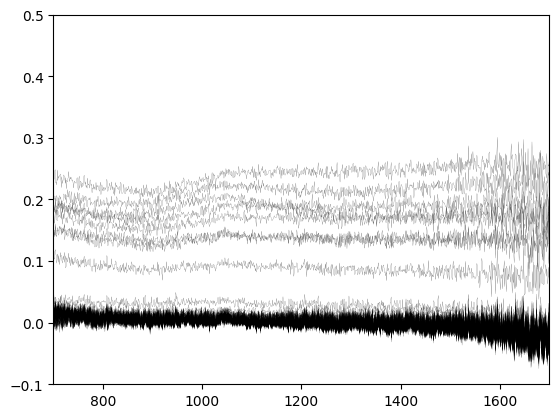

In [68]:
# просто посмотреть график в какойто папке
# ['15' '16' '17' '18' '19' '20' '25' '26' '27' '28' '29' '30' '31']
#  0    1    2    3    4    5    6    7    8    9    10   11   12
n = 108
# for i in range(len(data[n])):
#   data[n][i]=data[n][i][700:1600]
for i in range(len(data[n])):
    plt.plot(np.arange(len(data[n][i])), data[n][i], lw=0.1, color="black")
print(len(data[n]))
plt.xlim(700, 1700)
plt.ylim(-0.1, 0.5)

таймлайн

'\n    axs[1].set_ylabel("I(max)")\n    minus = dmax_list(_mas)\n    for i in range(len(_mas)):\n        axs[1].scatter(i, minus[i])\n    axs[1].plot(np.arange(len(minus)), minus, lw=0.2, color="black")\n\n    axs[2].set_ylabel("I(max)-I(650)")\n    minus = dmax_650_list(_mas)\n    for i in range(len(_mas)):\n        axs[2].scatter(i, minus[i])\n    axs[2].plot(np.arange(len(minus)), minus, lw=0.2, color="black")\n    if print_grafs==True: plt.savefig("timelane/" + str(folders_list[_folder]) + ".png")\n    '

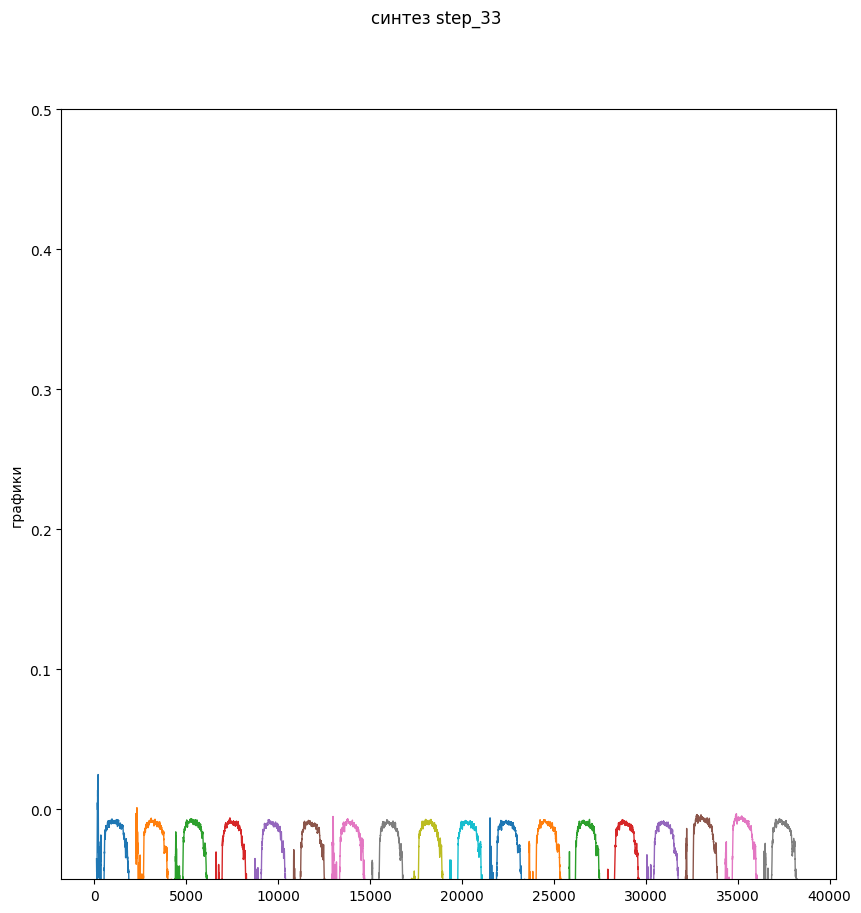

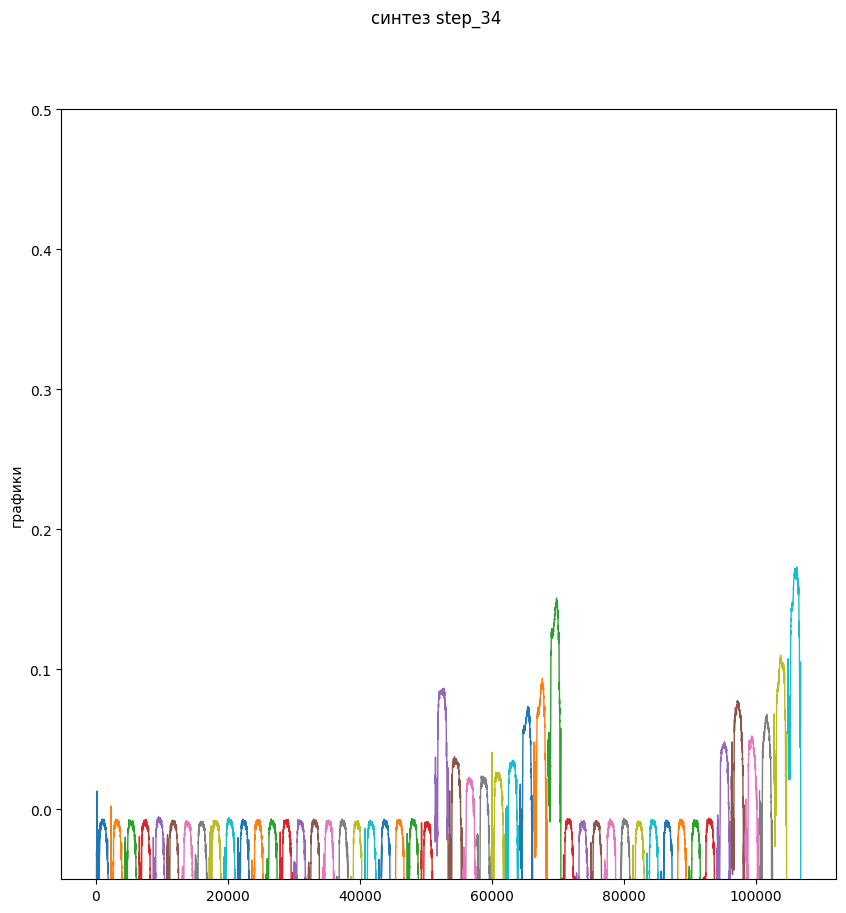

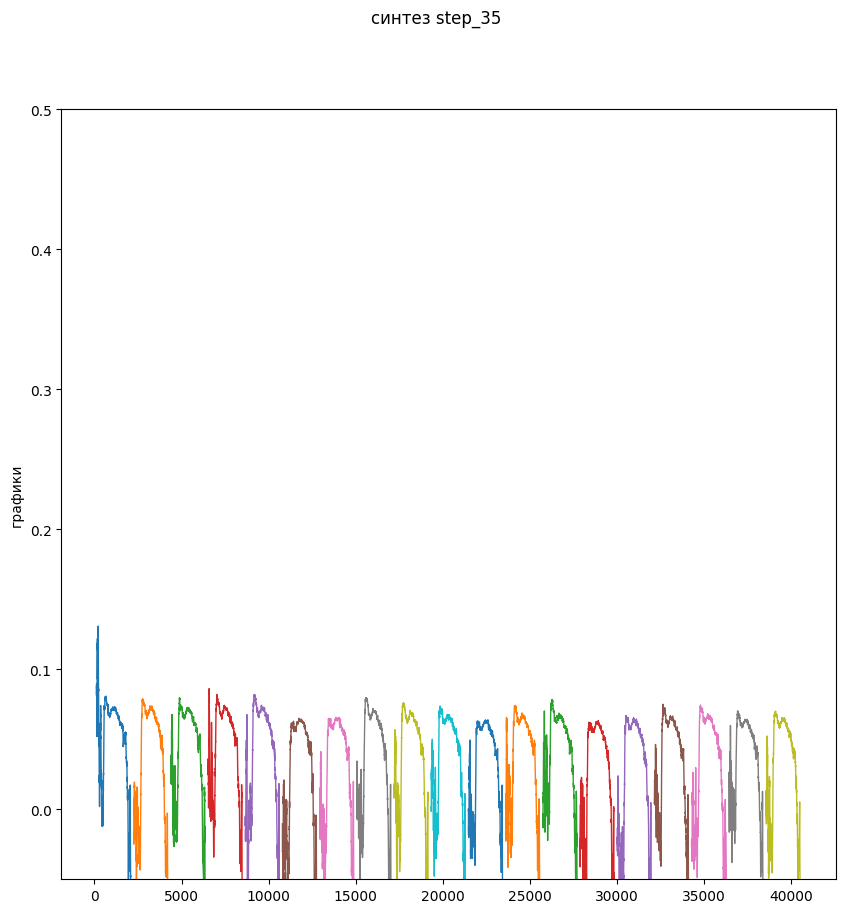

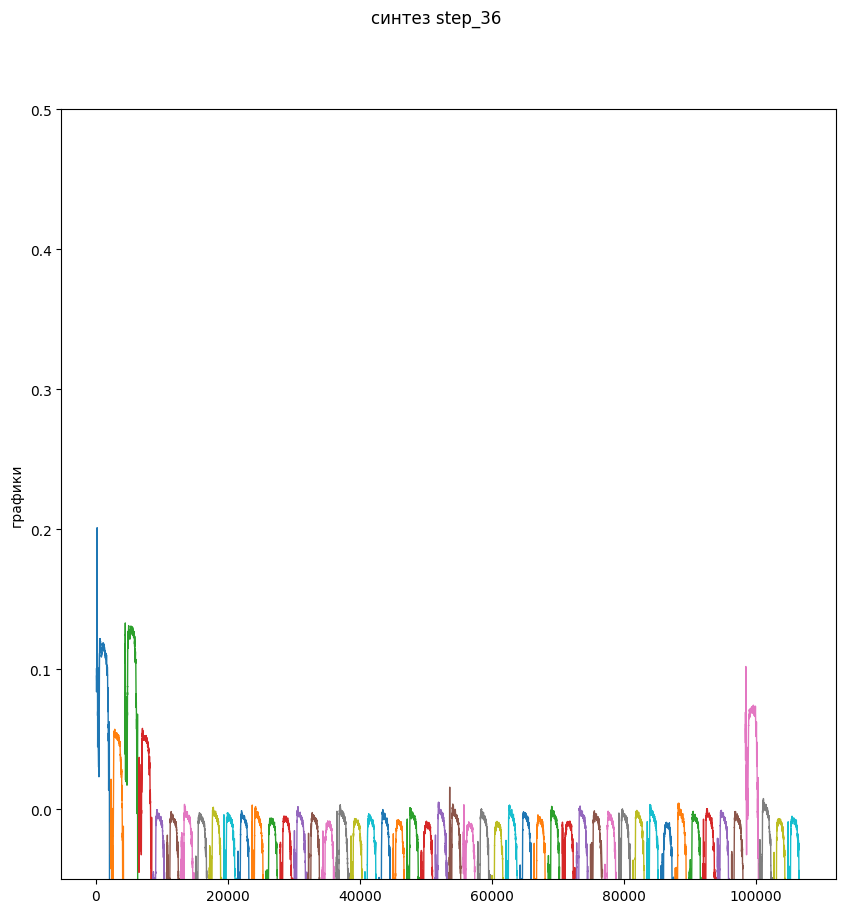

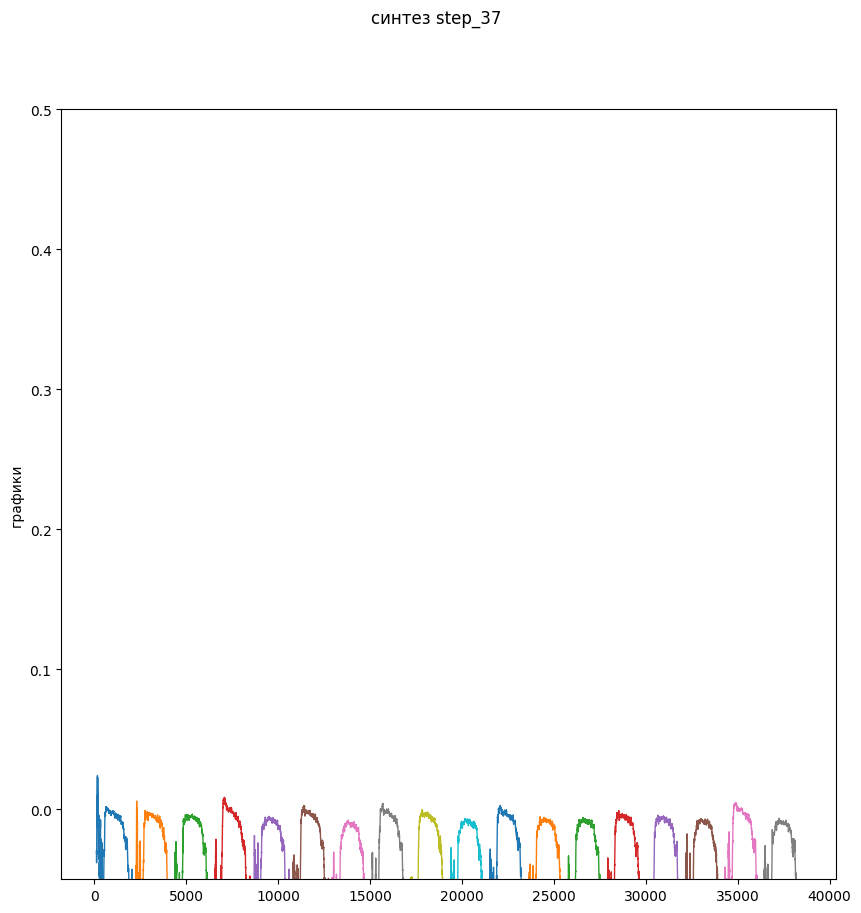

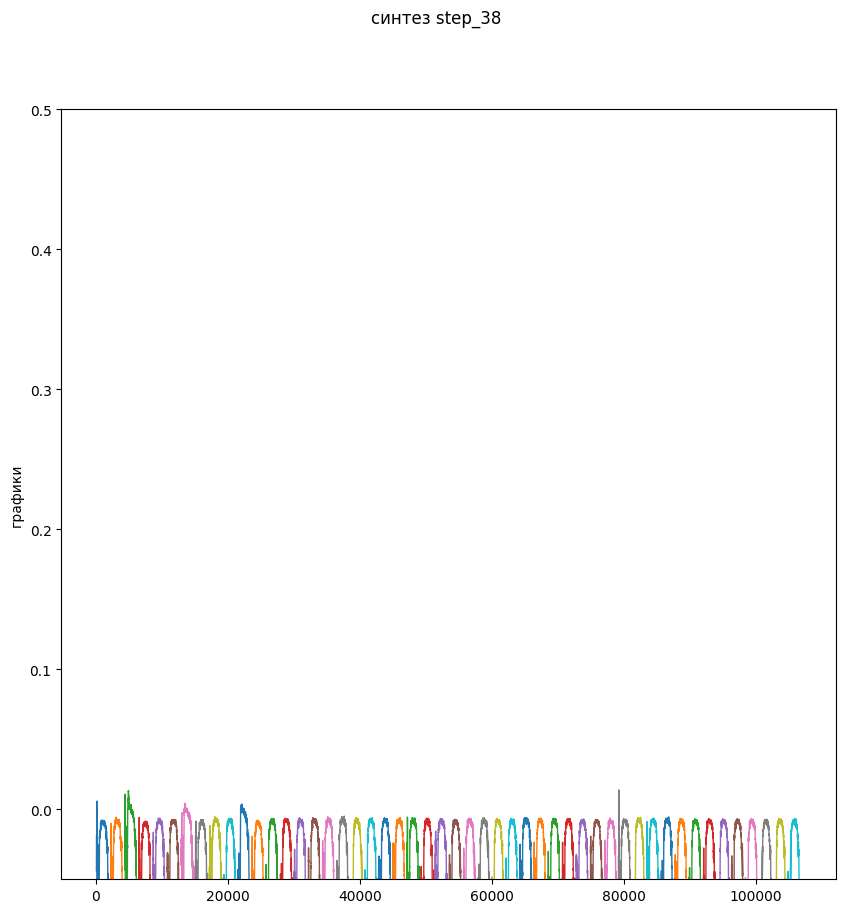

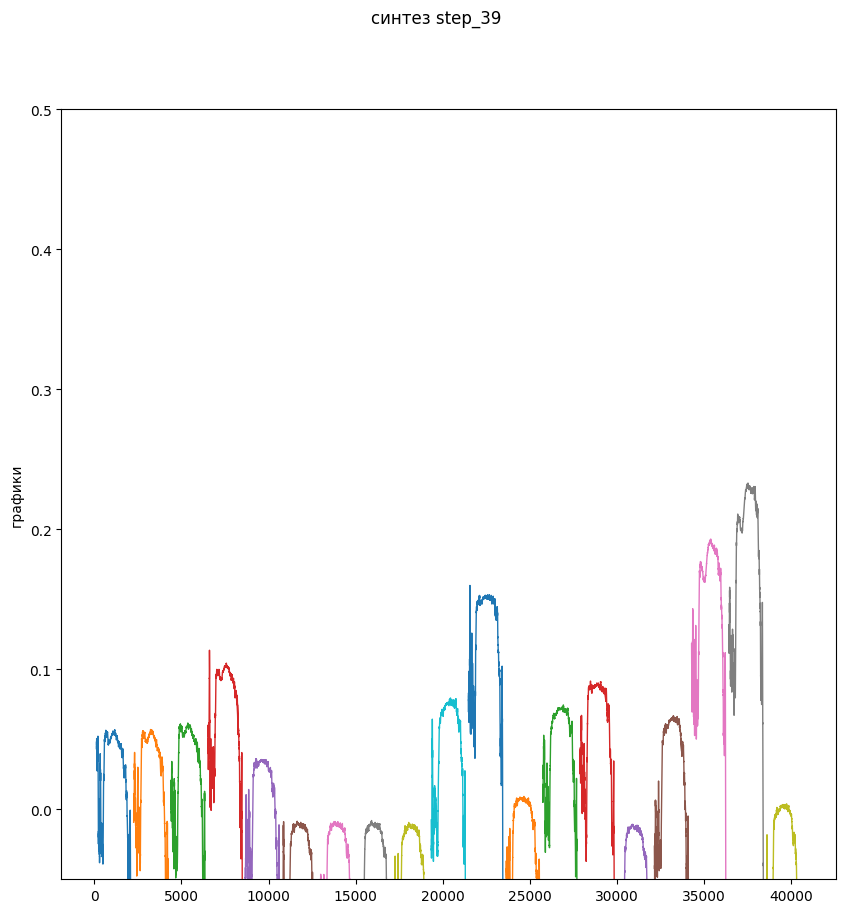

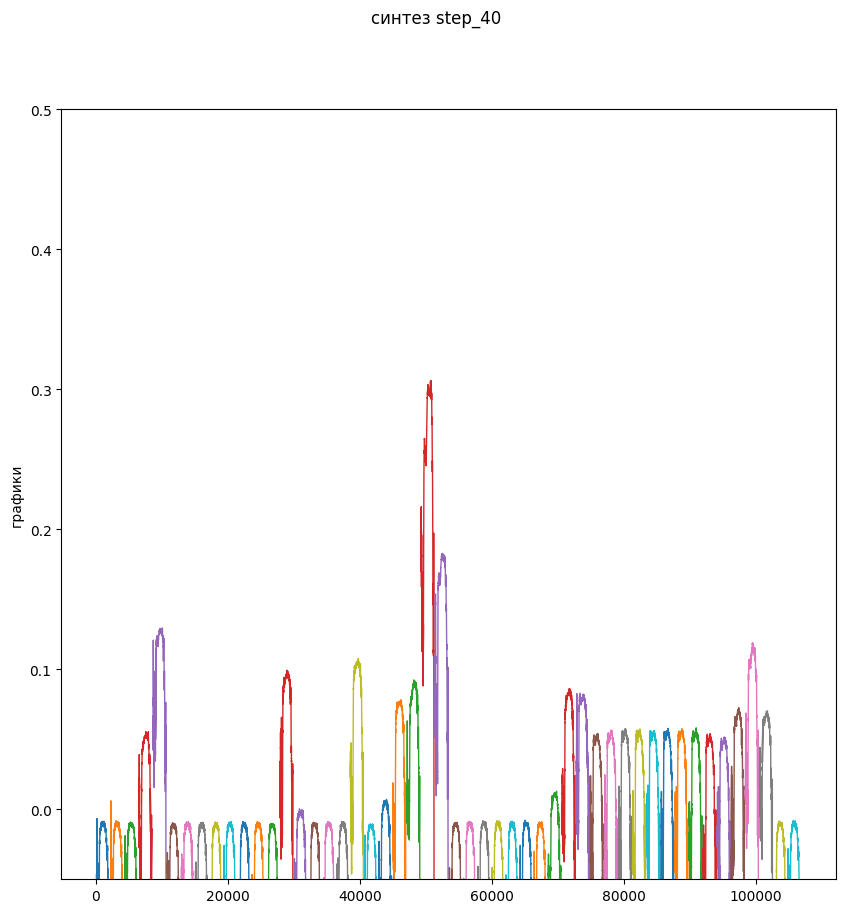

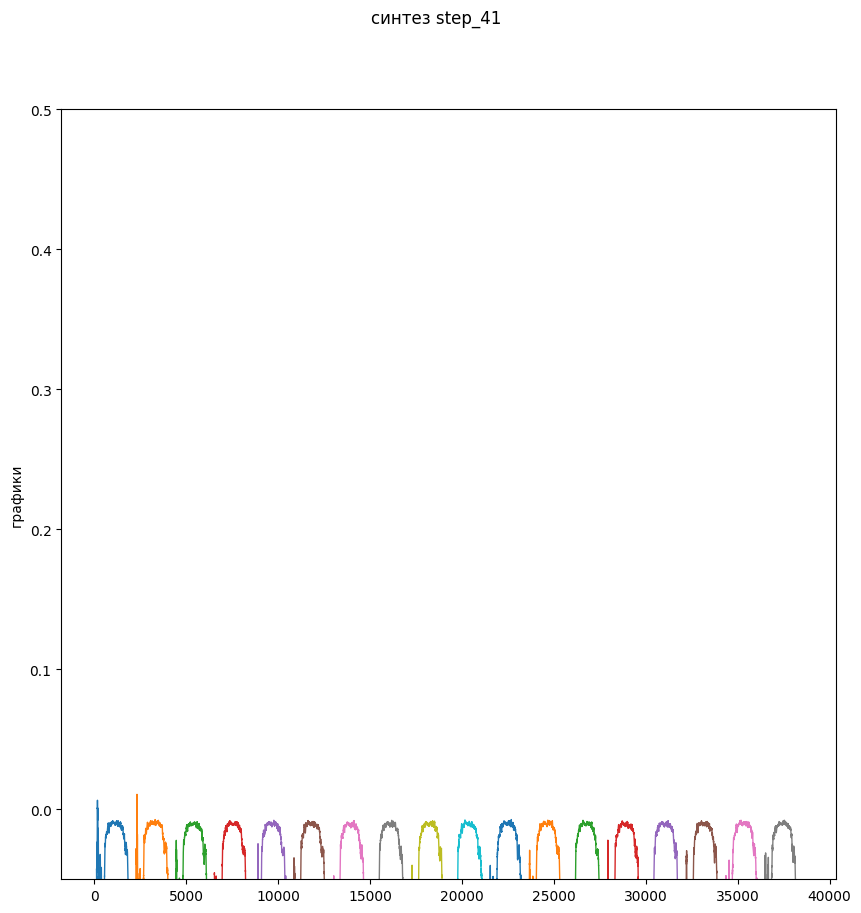

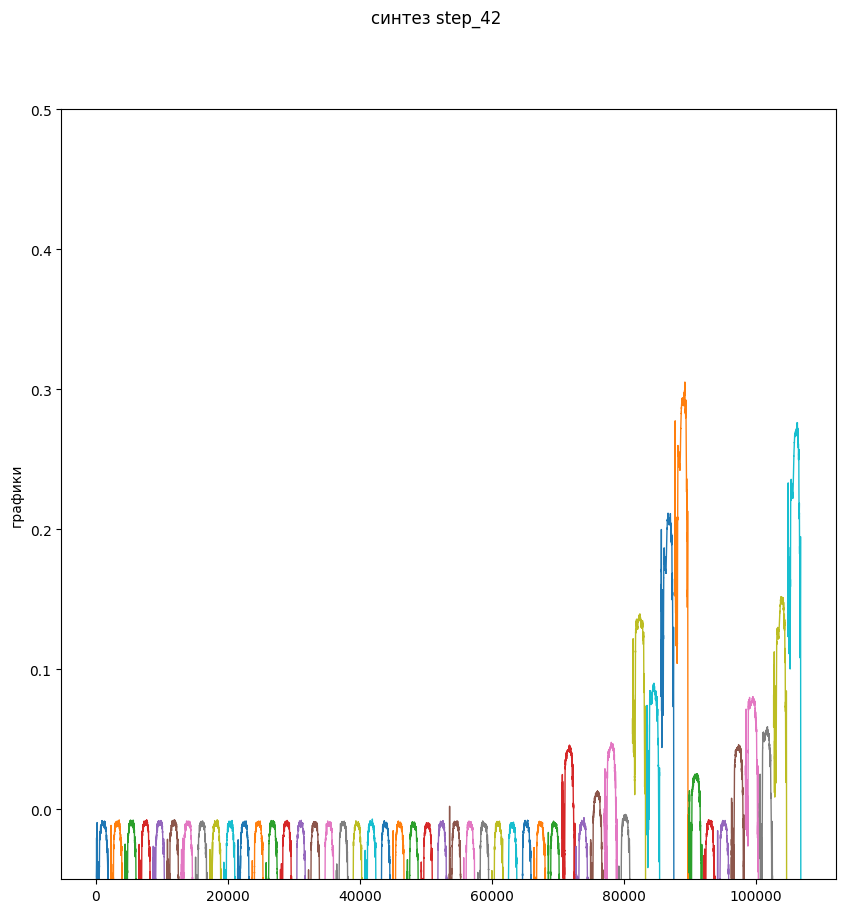

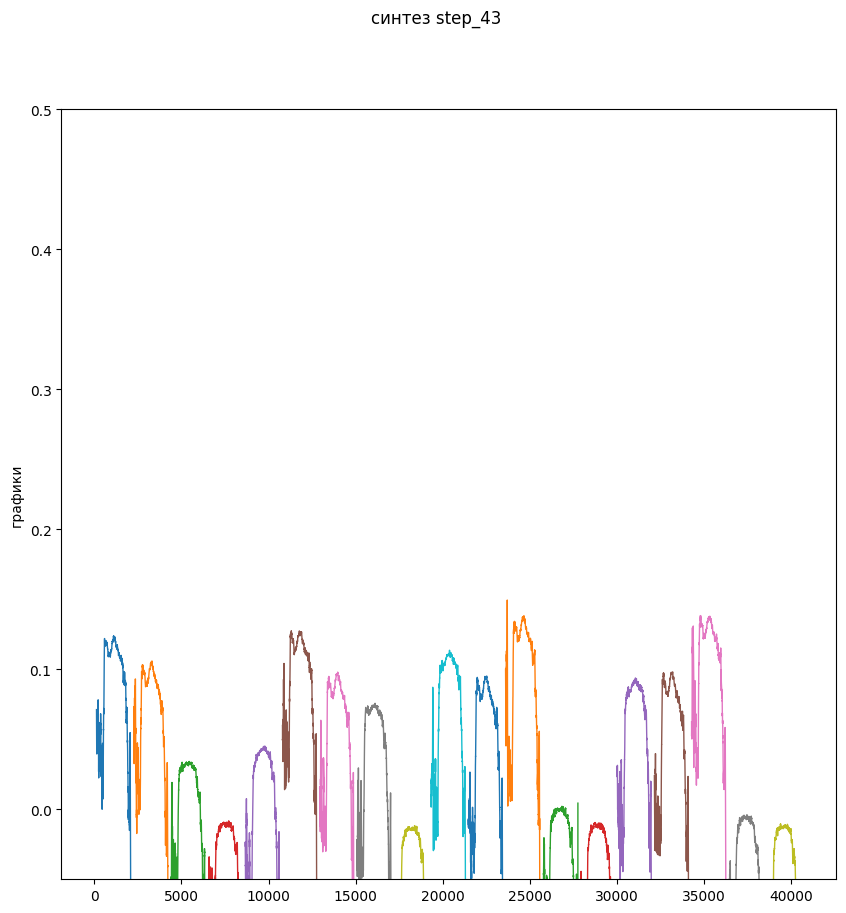

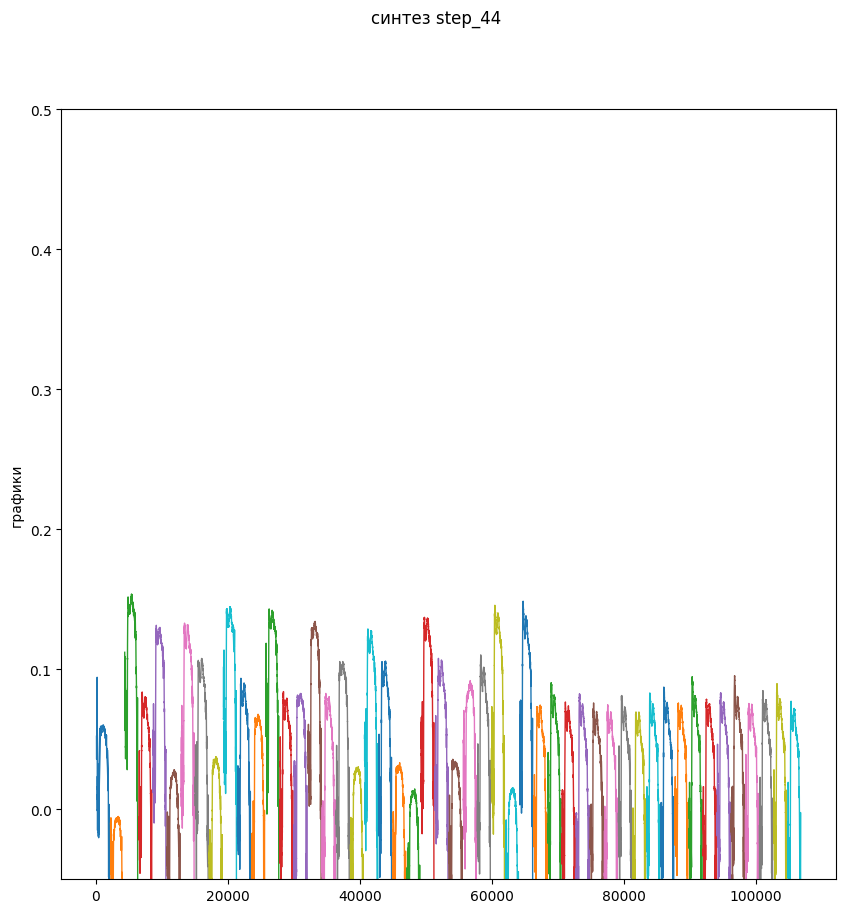

In [52]:
print_grafs = False
for _folder in range(33, 45):
    _a = 50
    if len(data[_folder]) < 50:
        _a = len(data[_folder])
    _mas = data[_folder][0:_a]  # 100 cпектров из папки
    for i in range(len(_mas)):
        _mas[i] = signal.savgol_filter(_mas[i], 60, 3)

    # plt.subplots(figsize=[10, 10]);plt.clf()
    fig, axs = plt.subplots(1, 1, figsize=(10, 10))

    # fig.tit title("синтез " + str(folders_list[_folder]))
    fig.suptitle("синтез " + str(folders_list[_folder]))
    axs.set_ylabel("графики")
    _sp = 0
    for i in range(len(_mas)):
        axs.plot(np.arange(_sp, _sp + len(_mas[i])), _mas[i], lw=1)
        _sp += len(_mas[i])
    axs.set_ylim(-0.05, 0.5)
"""
    axs[1].set_ylabel("I(max)")
    minus = dmax_list(_mas)
    for i in range(len(_mas)):
        axs[1].scatter(i, minus[i])
    axs[1].plot(np.arange(len(minus)), minus, lw=0.2, color="black")

    axs[2].set_ylabel("I(max)-I(650)")
    minus = dmax_650_list(_mas)
    for i in range(len(_mas)):
        axs[2].scatter(i, minus[i])
    axs[2].plot(np.arange(len(minus)), minus, lw=0.2, color="black")
    if print_grafs==True: plt.savefig("timelane/" + str(folders_list[_folder]) + ".png")
    """
# fig.clf();fig.clear()

первый способ выборки

In [ ]:
# пострение гистограм
from sklearn.neighbors import KernelDensity


def data_for_hist(mas, ind):
    ar = np.zeros(len(mas))
    if ind == "max":
        for i in range(len(mas)):
            ar[i] = np.max(mas[i])
    else:
        for i in range(len(mas)):
            ar[i] = mas[i][ind]
    return ar


def histograma(mas):
    hist, bins = np.histogram(mas, bins=50)
    hist = hist[5:]
    bins = bins[5:-1]
    return bins, hist


def kde(x):
    dx = x.max() - x.min()
    if dx == 0:
        return [x[0] - 1, x[0] - 0.01, x[0], x[0] + 0.01, x[0] + 1], [0, 0, 1, 0, 0]
    kde_sk = KernelDensity(bandwidth=dx / 100, kernel="gaussian")
    kde_sk.fit(x.reshape([-1, 1]))
    eval_points = np.linspace(x.min() - dx * 0.1, x.max() + dx * 0.1, 50)
    y_sk = np.exp(kde_sk.score_samples(eval_points.reshape(-1, 1)))
    return eval_points, y_sk


for n in range(len(folders_list)):
    masiv = data[n].copy()
    ar_max = data_for_hist(masiv, "max")
    ar_mean = data_for_hist(masiv, mean_point)
    ar_max_mean = np.divide(ar_max, ar_mean)

    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    axs[0].plot(*kde(ar_max), color="blue", label="KDE")
    axs[0].plot(*histograma(ar_max), color="red", label="гистограмма")

    bins, hist = histograma(ar_max)
    axs[0].set_title(str(folders_list[n]) + " распределение в точке максимума")

    axs[0].legend()

    gap = 0.01
    maximum = bins[np.argmax(hist)]
    ar = []
    for i in range(len(ar_max)):
        if maximum - gap <= ar_max[i] <= maximum + gap:
            ar.append(i)
    print(len(ar))
    print(ar)

    for i in range(len(masiv)):
        axs[1].plot(x, masiv[i], color="black", lw=0.01)

    for i in range(len(ar)):
        axs[1].plot(x, masiv[ar[i]], color="blue", lw=0.05)

    mas = []
    mins = []
    for i in range(len(ar)):
        mins.append(masiv[ar[i]][mean_point])
    mins = np.min(mins)
    for i in range(len(ar)):
        if masiv[ar[i]][mean_point] <= mins + 2 * gap:
            mas.append(masiv[ar[i]])
            axs[1].plot(x, masiv[ar[i]], color="red", lw=0.05)
    print(len(mas))
    axs[1].set_title("выбранные графики " + str(len(mas)) + "/" + str(len(masiv)))
    # plt.savefig("chosing/" + str(folders_list[n]) + ".png")

второй способ выборки

In [32]:
def data_for_hist(mas, ind):
    ar = np.zeros(len(mas))
    if ind == "max":
        for i in range(len(mas)):
            ar[i] = np.max(mas[i])
    else:
        for i in range(len(mas)):
            ar[i] = mas[i][ind]
    return ar


data_new = []
gap = 0.02
for n in range(len(folders_list)):
    masiv = data[n].copy()
    ar_max = data_for_hist(masiv, "max")
    ar_mean = data_for_hist(masiv, mean_point)
    ar_max_mean = ar_max - ar_mean

    maximum = np.max(ar_max_mean)
    ar = []  # индексы спектров с наибольшей разницей между мах и 650
    for i in range(len(ar_max_mean)):
        if ar_max_mean[i] > maximum - gap:
            ar.append(i)
    if len(ar) == 0:
        continue
    ar2 = []  # значения интенсивнотей в точке max
    for i in range(len(ar)):
        ar2.append(np.max(masiv[ar[i]]))
    minimum = np.min(ar2)

    ar3 = []  # индексы более подходящих спектров
    for i in range(len(ar)):
        if np.max(masiv[ar[i]]) < minimum + gap:
            ar3.append(ar[i])
    data_new.append(ar3)

In [ ]:
print(data_new)